In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./insurance.csv')

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
        data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.isnull().mean()*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [6]:
data.duplicated().sum()

1

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
data.shape

(1337, 7)

In [10]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### Exploaratory Data Analysis(EDA)

To check number of males and females using countplot

<AxesSubplot:xlabel='sex', ylabel='count'>

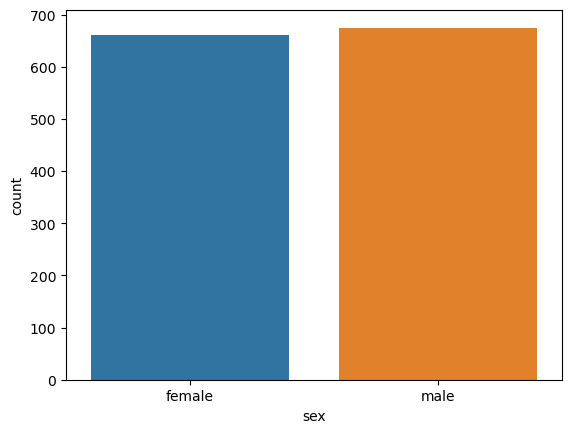

In [11]:
sns.countplot('sex', data=data)

To check number of childrens using countplot

<AxesSubplot:xlabel='children', ylabel='count'>

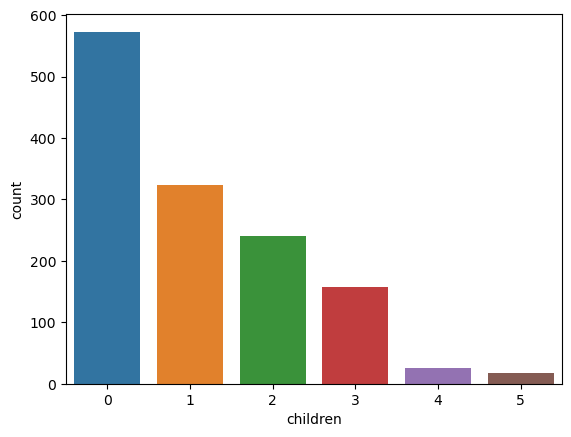

In [12]:
sns.countplot('children', data=data)

To check the number of peoples in a particular region

<AxesSubplot:xlabel='region', ylabel='count'>

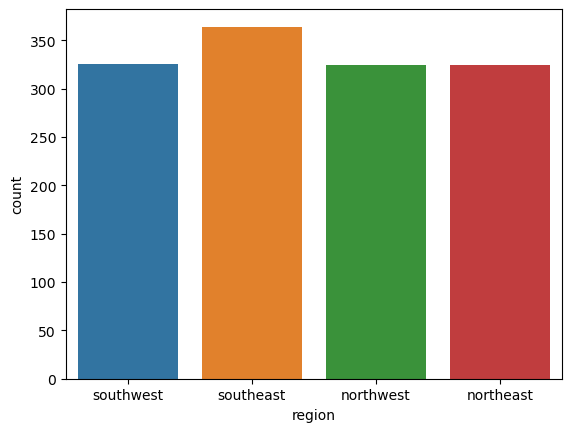

In [13]:
sns.countplot('region', data=data)

To check the check the charges with respect to age using lineplot

<AxesSubplot:xlabel='age', ylabel='charges'>

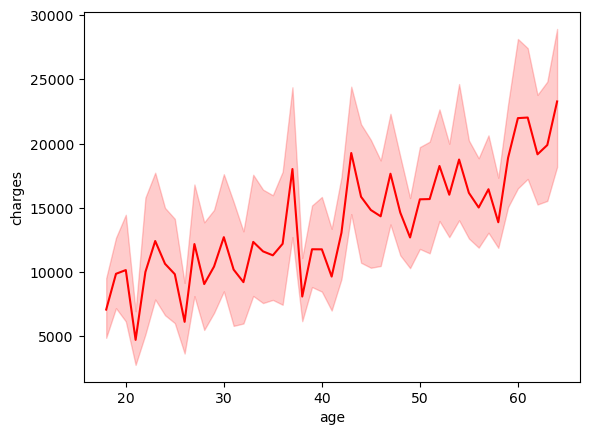

In [14]:
sns.lineplot('age', 'charges', data=data, color='red')

To check the smokers with respect to age

<AxesSubplot:xlabel='age', ylabel='charges'>

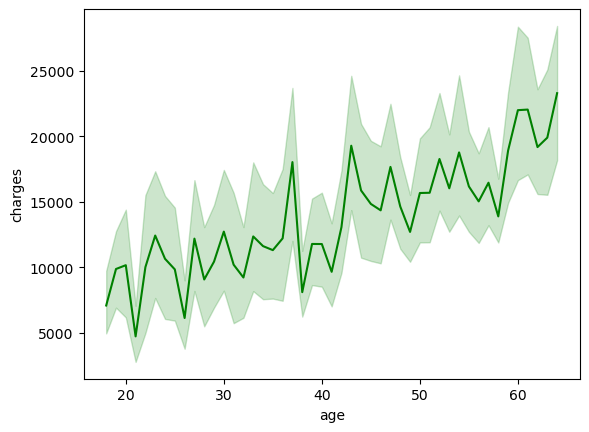

In [15]:
sns.lineplot('age', 'charges', data=data, color='green')

To check the smokers mostly in which region using line

<AxesSubplot:xlabel='region', ylabel='smoker'>

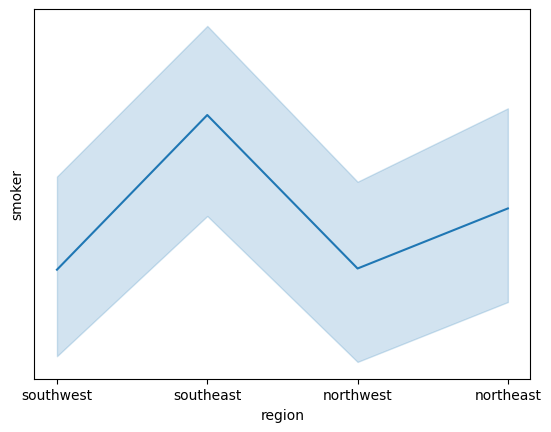

In [16]:
sns.lineplot('region', 'smoker', data=data)

To check the charges in different region using barplot

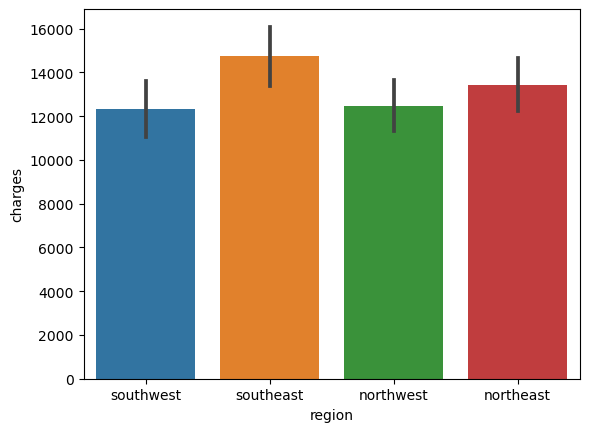

In [17]:
sns.barplot('region', 'charges', data=data)
plt.show()

To check the charges of males and females in different region

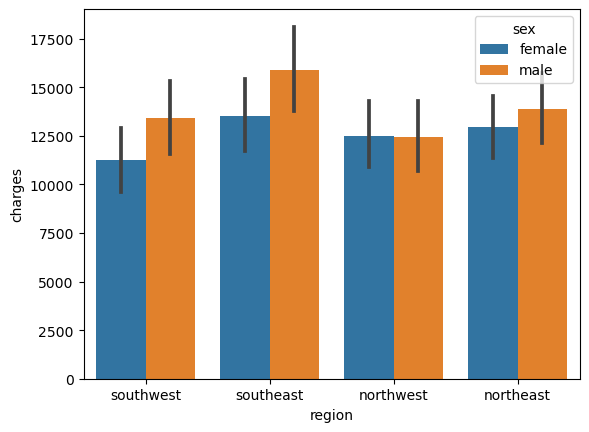

In [18]:
sns.barplot('region', 'charges', hue='sex', data=data)
plt.show()

To check the bmi of smokers in different ages

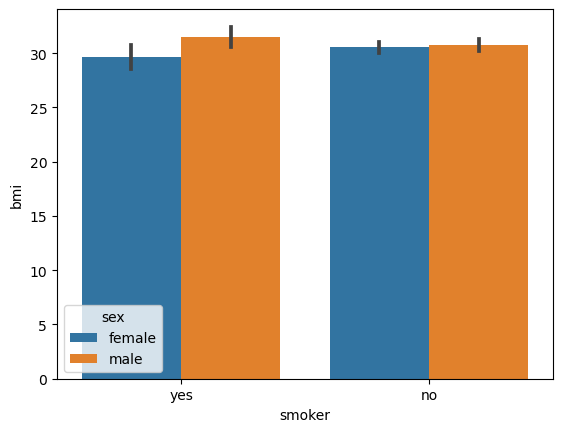

In [19]:
sns.barplot('smoker', 'bmi', hue='sex', data=data)
plt.show()

### Pie chart

In [20]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [21]:
sex_age=data.groupby(['children'])['age'].sum()
sex_age

children
0    22048
1    12783
2     9467
3     6526
4      975
5      641
Name: age, dtype: int64

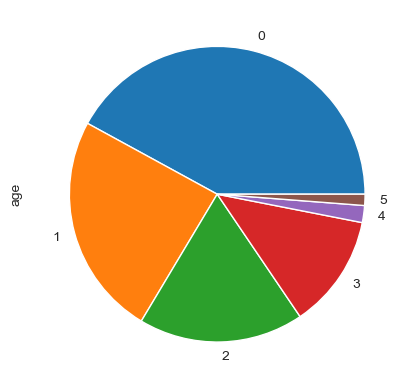

In [22]:
sns.set_style('ticks')
sex_age.plot.pie()
plt.show()

In [23]:
smoker_age=data.groupby(['smoker'])['age'].sum()
smoker_age

smoker
no     41887
yes    10553
Name: age, dtype: int64

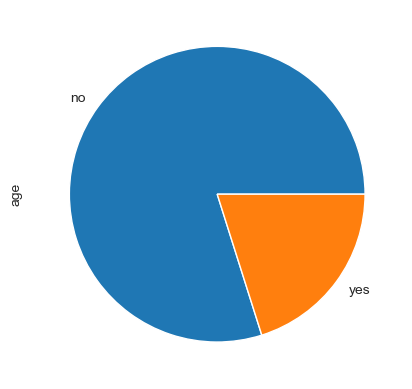

In [24]:
smoker_age.plot.pie()
plt.show()

In [25]:
sex_smoker_age= data.groupby(['sex','smoker'])['age'].sum()
sex_smoker_age

sex     smoker
female  no        21711
        yes        4440
male    no        20176
        yes        6113
Name: age, dtype: int64

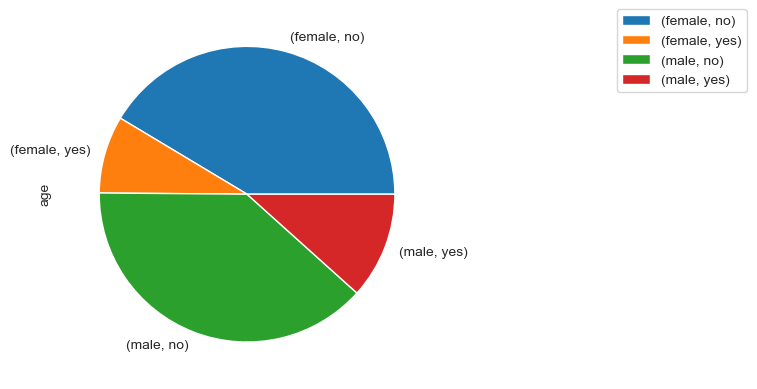

In [26]:
sex_smoker_age.plot.pie()
plt.legend(bbox_to_anchor=(1.5,1),loc='upper left',borderaxespad=0)
plt.show()

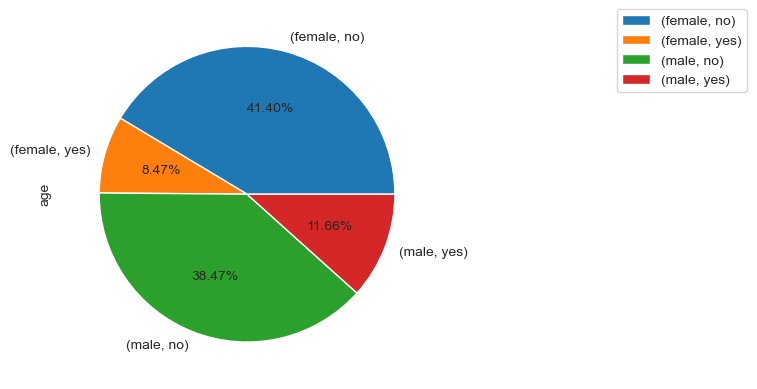

In [27]:
sex_smoker_age.plot.pie(autopct = '%1.2f%%')
plt.legend(bbox_to_anchor=(1.5,1),loc='upper left',borderaxespad=0)
plt.show()

### Factor plot

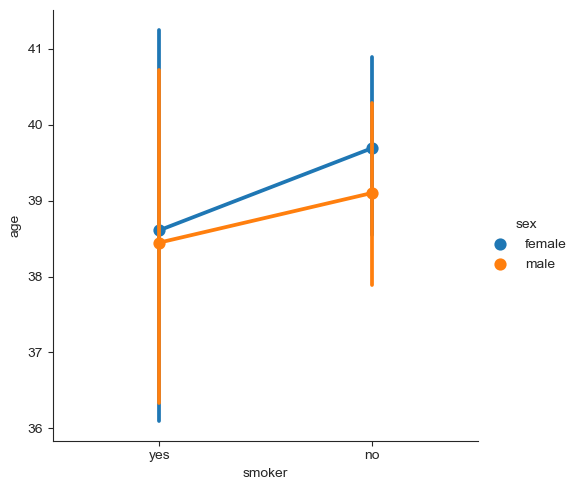

In [28]:
sns.factorplot('smoker', 'age', hue="sex", data=data)
plt.show()

### Violin plot

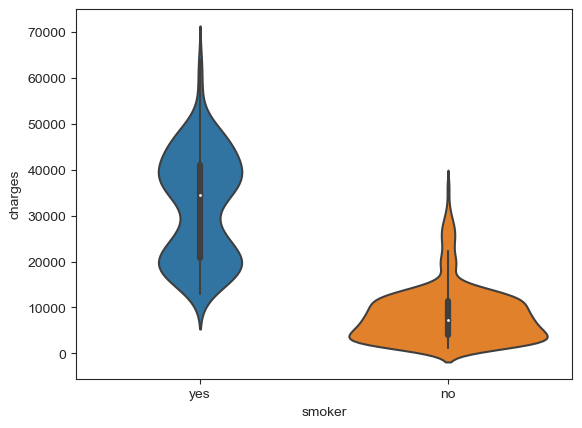

In [29]:
sns.violinplot('smoker', 'charges', data=data)
plt.show()

### Pair plot

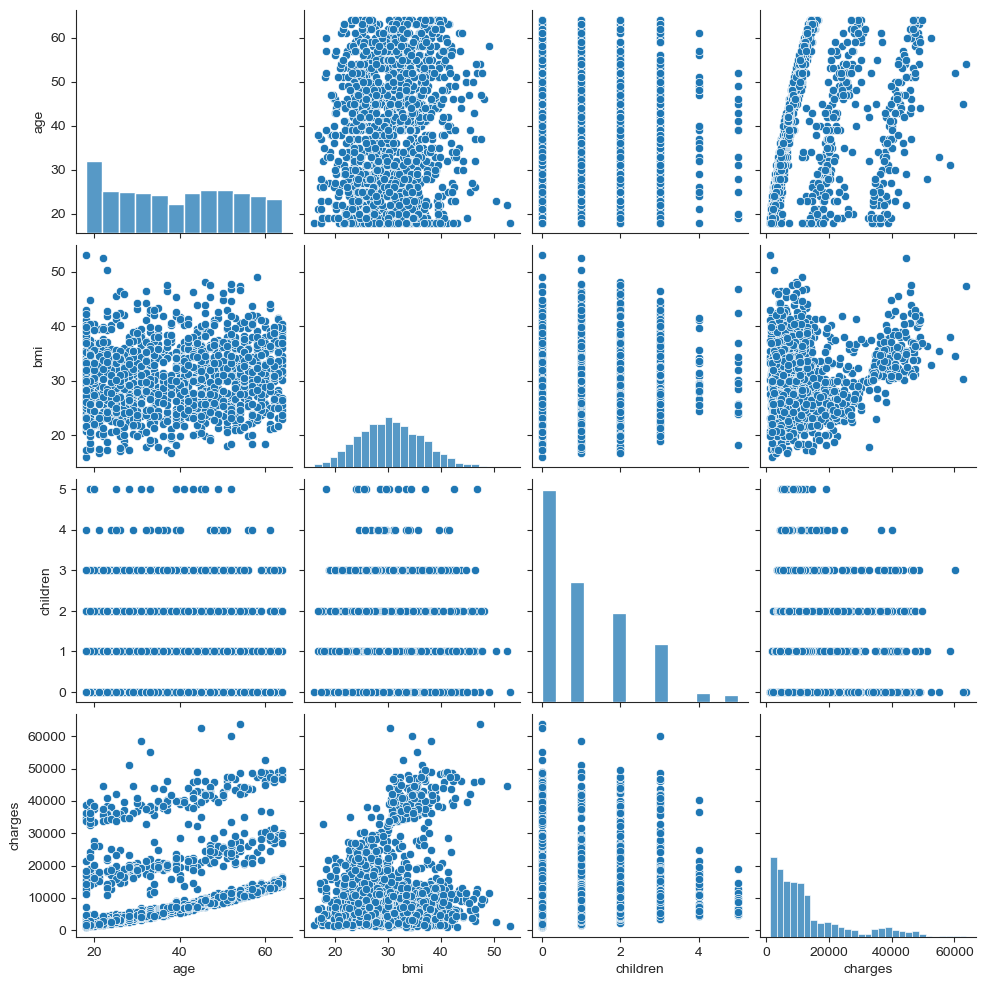

In [30]:
sns.pairplot(data=data)
plt.show()

### Heatmap

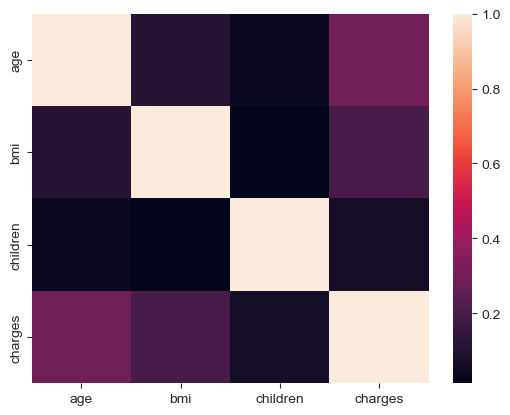

In [39]:
heat_map = data.corr()
sns.heatmap(heat_map)
plt.show()

### Descriptive method

 Maximum number of smokers present in which region

In [33]:
x = data.query('smoker=="yes"')
x.region.value_counts()

southeast    91
northeast    67
southwest    58
northwest    58
Name: region, dtype: int64

In [34]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Lists of male smokers

In [35]:
y = data.query('sex=="male" & smoker=="yes"')
y.value_counts()

age  sex   bmi     children  smoker  region     charges    
18   male  17.290  2         yes     northeast  12829.45510    1
47   male  29.800  3         yes     southwest  25309.48900    1
45   male  22.895  2         yes     northwest  21098.55405    1
           30.360  0         yes     southeast  62592.87309    1
           36.480  2         yes     northwest  42760.50220    1
                                                              ..
30   male  37.800  2         yes     southwest  39241.44200    1
31   male  25.900  3         yes     southwest  19199.94400    1
           29.810  0         yes     southeast  19350.36890    1
           34.390  3         yes     northwest  38746.35510    1
64   male  36.960  2         yes     southeast  49577.66240    1
Length: 159, dtype: int64

Lists of male smokers and age below or equal to 18

In [36]:
z = data.query("sex=='male' & age<=18 & smoker=='yes'")
z.value_counts()

age  sex   bmi     children  smoker  region     charges    
18   male  17.290  2         yes     northeast  12829.45510    1
           21.565  0         yes     northeast  13747.87235    1
           25.175  0         yes     northeast  15518.18025    1
           27.360  1         yes     northeast  17178.68240    1
           31.680  2         yes     southeast  34303.16720    1
           31.730  0         yes     northeast  33732.68670    1
           33.535  0         yes     northeast  34617.84065    1
           38.170  0         yes     southeast  36307.79830    1
dtype: int64

In [37]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


male smokers in northwest and southwest

In [41]:
x = data.query("sex=='male' & smoker=='yes' & region==['northwest','southwest']")
x.value_counts()

age  sex   bmi     children  smoker  region     charges    
19   male  26.030  1         yes     northwest  16450.89470    1
49   male  25.600  2         yes     southwest  23306.54700    1
38   male  19.300  0         yes     southwest  15820.69900    1
39   male  28.300  1         yes     southwest  21082.16000    1
           35.300  2         yes     southwest  40103.89000    1
                                                              ..
31   male  34.390  3         yes     northwest  38746.35510    1
           36.300  2         yes     southwest  38711.00000    1
32   male  28.120  4         yes     northwest  21472.47880    1
33   male  27.100  1         yes     southwest  19040.87600    1
62   male  30.875  3         yes     northwest  46718.16325    1
Length: 66, dtype: int64